In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

In [2]:
data = pd.read_csv("amazon_reviews.txt", delimiter = "\t")

In [3]:
data.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


In [4]:
data.loc[data["LABEL"] == "__label1__", "LABEL"] = '1'
data.loc[data["LABEL"] == "__label2__", "LABEL"] = '0'
data.index.fillna("N/A")

RangeIndex(start=0, stop=21000, step=1)

In [5]:
len(data)

21000

In [6]:
cnt_srs = data.groupby(['LABEL']).PRODUCT_CATEGORY.value_counts()
cnt_srs

LABEL  PRODUCT_CATEGORY      
0      Apparel                   350
       Automotive                350
       Baby                      350
       Beauty                    350
       Books                     350
       Camera                    350
       Electronics               350
       Furniture                 350
       Grocery                   350
       Health & Personal Care    350
       Home                      350
       Home Entertainment        350
       Home Improvement          350
       Jewelry                   350
       Kitchen                   350
       Lawn and Garden           350
       Luggage                   350
       Musical Instruments       350
       Office Products           350
       Outdoors                  350
       PC                        350
       Pet Products              350
       Shoes                     350
       Sports                    350
       Tools                     350
       Toys                      350
       V

In [7]:
cnt_srs1 = data.groupby(data["LABEL"]).RATING.value_counts()
cnt_srs1

LABEL  RATING
0      5         6151
       4         1974
       3          942
       1          868
       2          565
1      5         6059
       4         1999
       3          926
       1          889
       2          627
Name: RATING, dtype: int64

In [8]:
cnt_srs2 = data.groupby(data["RATING"]).PRODUCT_CATEGORY.value_counts()
cnt_srs2

RATING  PRODUCT_CATEGORY  
1       Wireless              103
        Office Products        91
        PC                     84
        Lawn and Garden        77
        Electronics            74
                             ... 
5       Watches               375
        Shoes                 371
        Home Entertainment    359
        Wireless              357
        Furniture             342
Name: PRODUCT_CATEGORY, Length: 150, dtype: int64

In [9]:
cnt_srs3 = data.groupby("VERIFIED_PURCHASE").LABEL.value_counts()
cnt_srs3

VERIFIED_PURCHASE  LABEL
N                  1        7623
                   0        1679
Y                  0        8821
                   1        2877
Name: LABEL, dtype: int64

In [10]:
df1 = data.groupby("LABEL").REVIEW_TEXT

In [11]:
data['TEXT_LENGTH'] = data['REVIEW_TEXT'].apply(len)


In [12]:
cnt_srs4 = data.groupby(["LABEL"]).TEXT_LENGTH.agg(lambda x: sum(x)/len(x))
cnt_srs4

LABEL
0    428.102857
1    316.550000
Name: TEXT_LENGTH, dtype: float64

C:\Users\Manu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


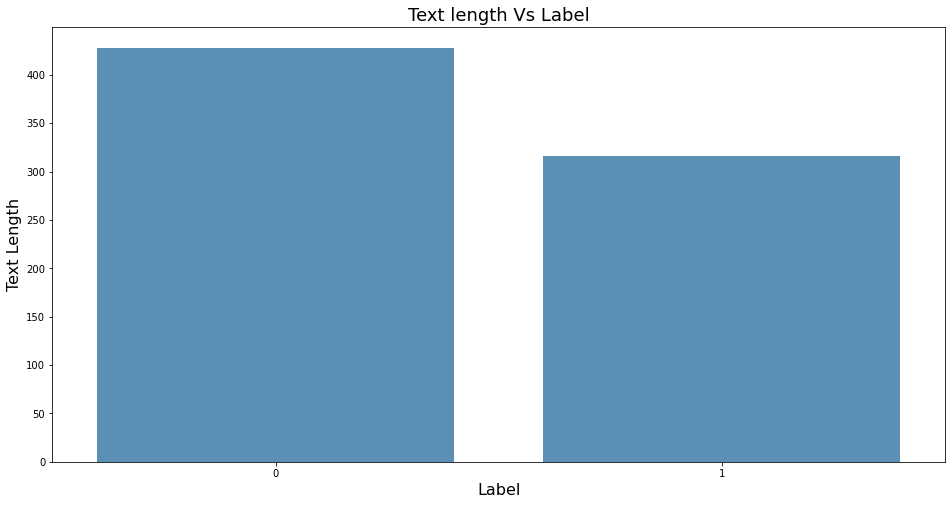

In [45]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs4.index, cnt_srs4.values, alpha=0.8, color=color[0])
plt.ylabel('Text Length', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Text length Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [46]:
data['num_sentences'] = data['REVIEW_TEXT'].apply(lambda x: len(str(x).split('.')))
#data['num_syllable'] = data['REVIEW_TEXT'].apply(lambda x: len(str(x).split('')))

In [15]:
data

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH,num_sentences
0,1,1,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",116,3
1,2,1,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,404,4
2,3,1,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,248,6
3,4,1,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,212,5
4,5,1,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,331,4
...,...,...,...,...,...,...,...,...,...,...,...
20995,20996,0,4,Y,Shoes,B00BXYM8T8,"Madden Girl Women's Gettaw Pump,Red Patent,7.5...",wide width is great!,"I bought these for work. I have high arches, ...",100,4
20996,20997,0,4,Y,Shoes,B0014C2ORK,"crocs Unisex Classic Clog,Khaki,6 US Men's / 8...",Love crocs!,Crocs are one of only two brands of shoes that...,115,1
20997,20998,0,5,Y,Shoes,B000EX8CCQ,Minnetonka Men's 703 Leather Laced Softsole Mo...,I love moccasins This fit like it was custom m...,I love moccasins This fit like it was custom ...,297,4
20998,20999,0,5,Y,Shoes,B00748YHVE,Ariat Womens Unbridled Fatbaby 9 B Powder Brown,"This fit well, comfortable, best investment",I wish these were a little more durable. I got...,287,6


In [16]:
!pip install textstat

In [17]:
import textstat
#from textstat import flesch_kincaid_grade

In [18]:
from textstat.textstat import textstat
data["FK_Score"] = data["REVIEW_TEXT"].apply(textstat.flesch_kincaid_grade)

In [19]:
cnt_srs5 = data.groupby(["LABEL"]).FK_Score.agg(lambda x: sum(x)/len(x))
cnt_srs5

LABEL
0    13.803848
1     8.007886
Name: FK_Score, dtype: float64

C:\Users\Manu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


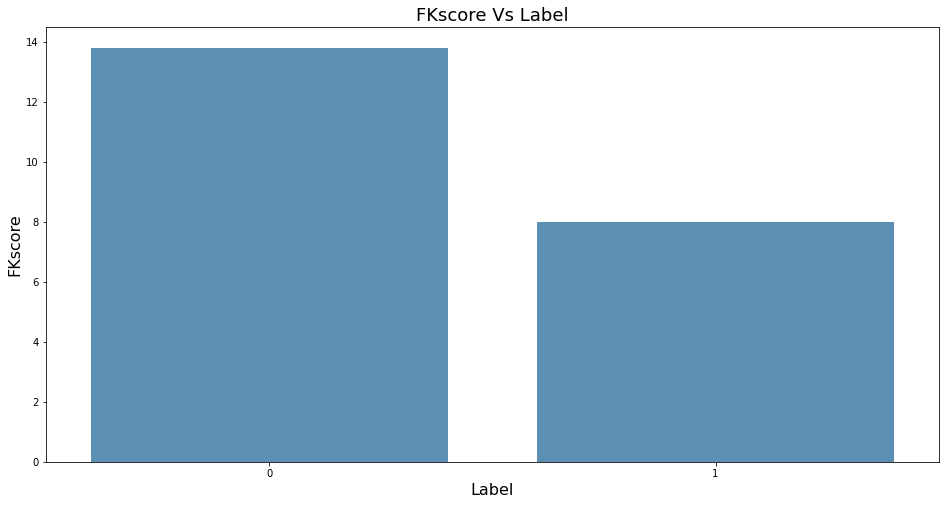

In [20]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs5.index, cnt_srs5.values, alpha=0.8, color=color[0])
plt.ylabel('FKscore', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('FKscore Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [21]:
import nltk
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

In [22]:
def stopCount(x):
    sum =0
    for char in x.split():
        sum+= char in stop_words
    return sum
data['stop_count'] = data['REVIEW_TEXT'].apply(stopCount)


In [23]:
cnt_srs = data.groupby(["LABEL"]).stop_count.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    32.519048
1    24.696190
Name: stop_count, dtype: float64

C:\Users\Manu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


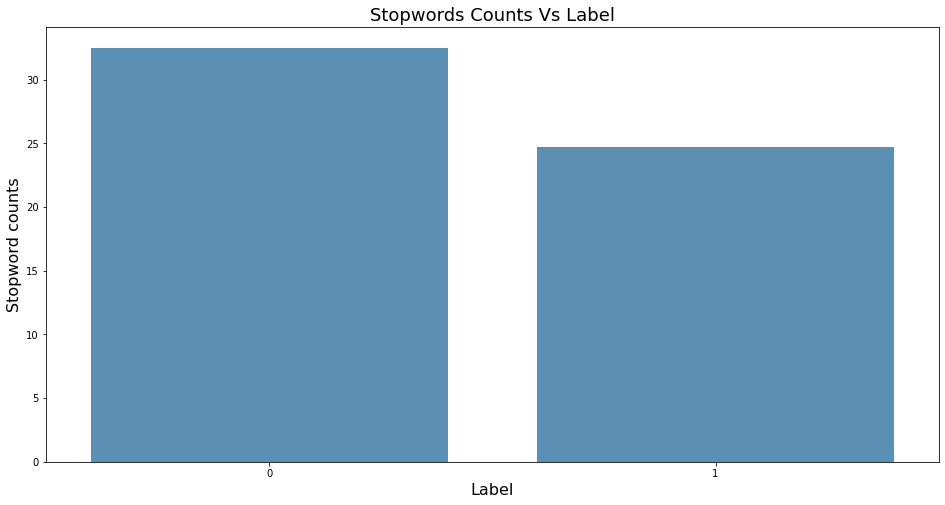

In [24]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Stopword counts', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Stopwords Counts Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [25]:
def capsCount(x):
    sum =0
    for char in x:
        sum+= char in "QWERTYUIOPASDFGHJKLZXCVBNM"
    return sum
data['caps_count'] = data['REVIEW_TEXT'].apply(capsCount)


In [26]:
cnt_srs = data.groupby(["LABEL"]).caps_count.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    12.099810
1     8.712667
Name: caps_count, dtype: float64

C:\Users\Manu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


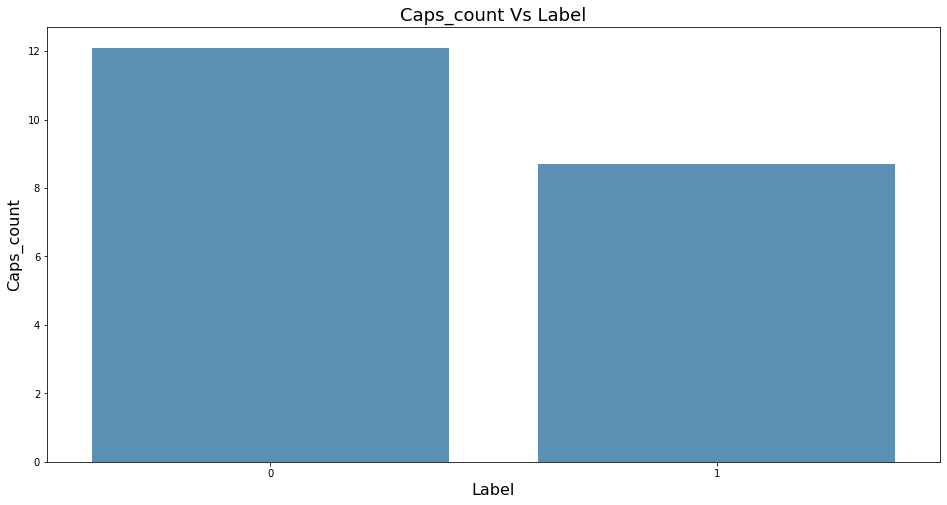

In [27]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Caps_count', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Caps_count Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [28]:
import string
count = lambda l1,l2: sum([1 for x in l1 if x in l2])
def punctCount(x):
    return count(x, set(string.punctuation))
data['punct_count'] = data['REVIEW_TEXT'].apply(punctCount)

In [29]:
cnt_srs6 = data.groupby(["LABEL"]).punct_count.agg(lambda x: sum(x)/len(x))
cnt_srs6

LABEL
0    15.571524
1    10.182571
Name: punct_count, dtype: float64

C:\Users\Manu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


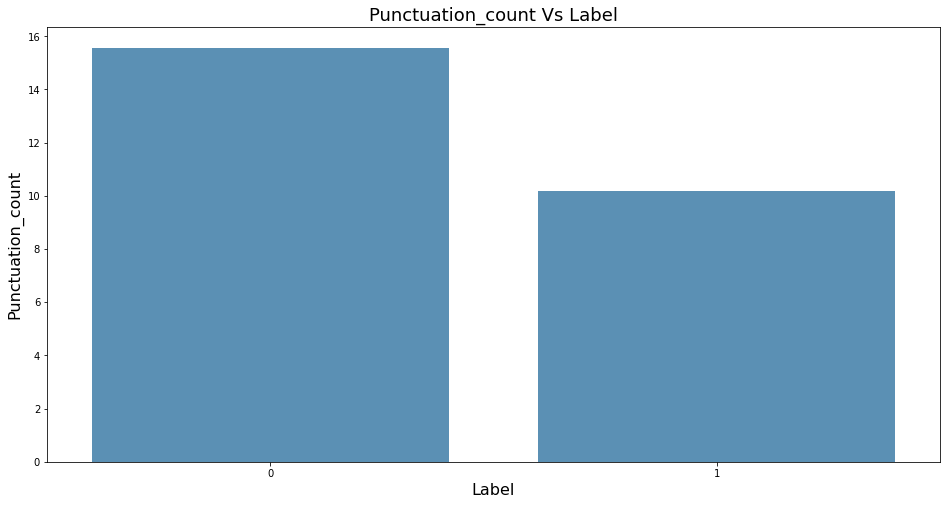

In [30]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs6.index, cnt_srs6.values, alpha=0.8, color=color[0])
plt.ylabel('Punctuation_count', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Punctuation_count Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [31]:
import re
import string
match_list = []

def checkName(title,text):
    matches = []
    for word in title.split():
        #removing punctuation
        word = "".join((char for char in word if char not in string.punctuation))
        #print(word)
        myreg = r'\b'+word+r'\b'
        r = re.compile(myreg, flags=re.I | re.X)
        matches.append(r.findall(text))
    return len(matches)
        

for a,b in zip(data.PRODUCT_TITLE, data.REVIEW_TEXT):
    number_of_matches = checkName(a,b)
    match_list.append(number_of_matches)
    
data["matchesDf"] = match_list

In [32]:
cnt_srs7 = data.groupby(["LABEL"]).matchesDf.agg(lambda x: sum(x)/len(x))
cnt_srs7

LABEL
0    10.570667
1    13.823143
Name: matchesDf, dtype: float64

C:\Users\Manu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


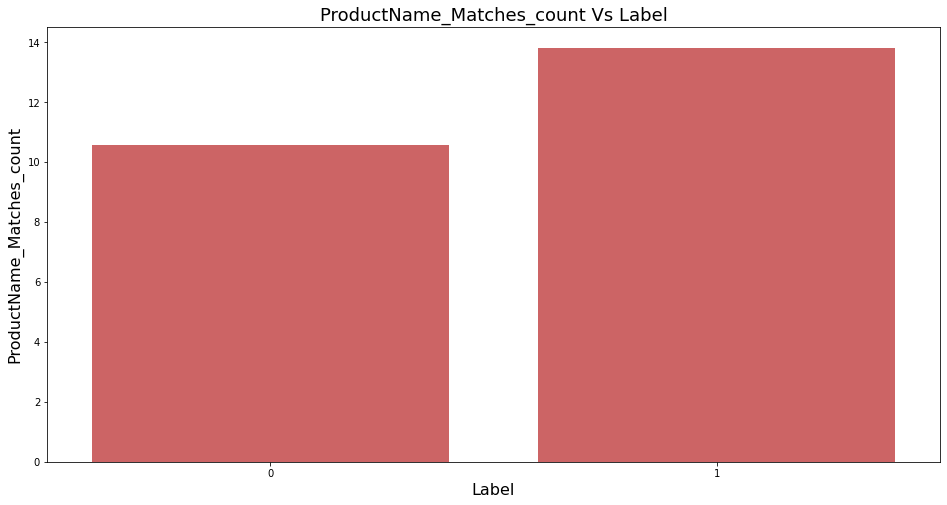

In [33]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs7.index, cnt_srs7.values, alpha=0.8, color=color[3])
plt.ylabel('ProductName_Matches_count', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('ProductName_Matches_count Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [34]:
data["emojis"] = data["REVIEW_TEXT"].apply(lambda x: 1 if ";)" in x.split() or ":)" in x.split() or ":-)" in x.split() else 0)

In [35]:
cnt_srs8 = data.groupby(["LABEL"]).emojis.agg(lambda x: sum(x))
cnt_srs8

LABEL
0    107
1     85
Name: emojis, dtype: int64

C:\Users\Manu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


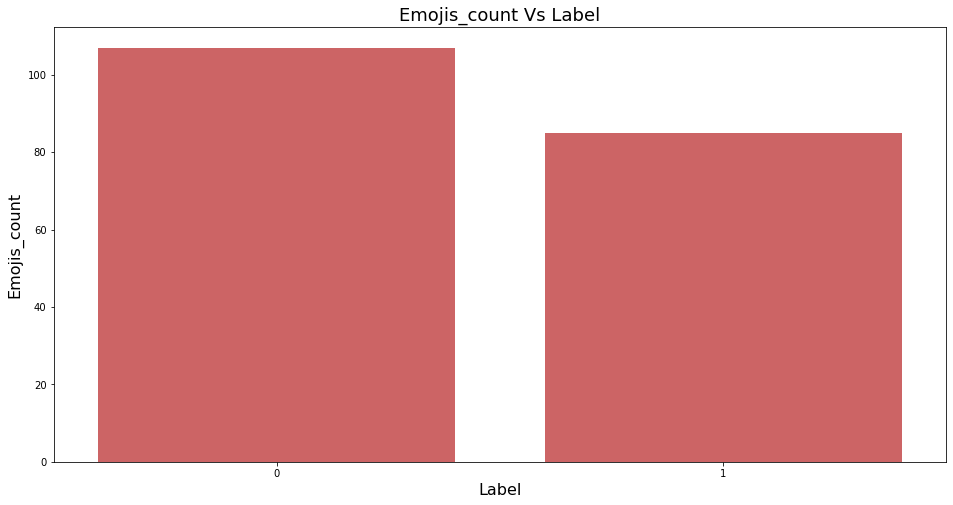

In [36]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs8.index, cnt_srs8.values, alpha=0.8, color=color[3])
plt.ylabel('Emojis_count', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Emojis_count Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

====== SENTIMENT CLASSIFIER ======

In [37]:
#SENTIMENT CLASSIFIER
data.loc[data["RATING"] < 3, "RATING"] = 0
data.loc[data["RATING"] > 3, "RATING"] = 1


In [40]:
data.RATING.value_counts()

1    16183
0     2949
3     1868
Name: RATING, dtype: int64

In [41]:
data1 = data.loc[data['RATING'] == 1]
print(len(data1))
data2 = data1.sample(frac=0.2, replace=True)
print(len(data2))
data3 = data1 = data.loc[data['RATING'] == 0]

16183
3237


In [42]:
data4 = pd.concat([data2, data3], ignore_index=True)
data4

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH,num_sentences,FK_Score,stop_count,caps_count,punct_count,matchesDf,emojis
0,14671,0,1,Y,Video DVD,B00IIPL1LQ,Grand Piano,Has suspenseful plot and many unexpected twists.,Suspenseful moments. How to escape this trap?...,240,4,18.5,21,9,10,2,0
1,9122,1,1,N,Shoes,B00LBG3554,Arcadia Fashion Shoulder Handbag Purse And Mat...,She loves skulls and loved this bag,Bought this bag for my gf. She loves skulls an...,122,4,1.9,8,4,3,12,0
2,11621,0,1,Y,Furniture,B001G0NNPC,"South Shore Furniture, Prairie Collection, Hea...",Great Headboard!!!,This headboard is very attractive and very wel...,128,1,8.3,10,2,2,9,0
3,11436,0,1,N,Camera,B00UT0R5B8,Selens 168 LED Dimmable Ultra High Power Panel...,From a videographer: Awesome for lowlight wedd...,[[VIDEOID:23a12c71b01ac7a7780a36c32b31291b]] 🎥...,1545,23,26.2,59,109,128,27,0
4,1438,1,1,N,Grocery,B004CGZGH0,"SweetGourmet Atomic Fireballs, Wrapped, 5lb",only for me,I get this only for me because I can't exactly...,208,2,7.0,23,5,4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6181,20961,0,0,Y,Shoes,B0069F61NU,MG Collection Lucca Designer Inspired Glamour ...,not same,"the bag is not same as the picture, nothing is...",109,2,9.5,13,1,5,12,0
6182,20967,0,0,Y,Shoes,B005B9GFUY,Fila Women's Memory Flux Slip Resistant Traini...,"Too man""ish""",These are so manish looking I sent them back. ...,146,4,3.1,9,5,7,12,0
6183,20970,0,0,Y,Shoes,B008MI08ZO,Stride Rite Star Wars Morphing Light-Up Sneake...,JUNK!,We are on our third pair in less than 2 months...,485,4,38.3,52,8,7,14,0
6184,20983,0,0,Y,Shoes,B00IA6US7G,West Blvd Womens LIMA MOCCASIN Boots 3-Layer F...,Good thing they are only for one outfit to hav...,These run I would say two sizes smaller than w...,487,8,5.1,41,14,16,18,0


In [43]:
rawData = data4[["REVIEW_TEXT", "RATING"]]
rawData = [tuple(x) for x in rawData.values]


In [44]:
rawData

[('Suspenseful moments.  How to escape this trap?  Who is behind this?  WHY???  I did not care for the musical piece which was the reason for the whole plot; however, I did not figure out where it was headed.  Elijah did a great job of acting.',
  1),
 ('Bought this bag for my gf. She loves skulls and loved this bag. Quality is great for the price. Would definitely recommend',
  1),
 ('This headboard is very attractive and very well made!  Just what we were looking for and looks great with matching night tables!',
  1),
 ('[[VIDEOID:23a12c71b01ac7a7780a36c32b31291b]] 🎥 Video review. 🎥<br /><br />*UPDATE*  I went onset today and actually saw a professional crew using these lights.<br /><br />Personal tip: Get this light from Selens instead of the "Neewer" ("best seller") here on Amazon.  (Link here: [[ASIN:B004TJ6JH6 NEEWER® 160 LED CN-160 Dimmable Ultra High Power Panel Digital Camera / Camcorder Video Light, LED Light for Canon, Nikon, Pentax, Panasonic,SONY, Samsung and Olympus Digit